In [175]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [176]:
dataset = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = dataset.load_data(num_words = 10000)

In [177]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [178]:
loss = ['mean_squared_error', 'mean_absolute_error', 'binary_crossentropy']
val_results = []
for i in loss:
    model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                                 keras.layers.Dense(16, activation='relu'), 
                                 keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='sgd', loss=i, metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_data = (x_val, y_val))
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    val_results.append(val_acc_values)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4930 - loss: 0.2508 - val_accuracy: 0.5417 - val_loss: 0.2487
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5621 - loss: 0.2476 - val_accuracy: 0.6098 - val_loss: 0.2446
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6329 - loss: 0.2426 - val_accuracy: 0.6844 - val_loss: 0.2378
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6986 - loss: 0.2344 - val_accuracy: 0.7220 - val_loss: 0.2259
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7354 - loss: 0.2212 - val_accuracy: 0.7540 - val_loss: 0.2108
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.2041 - val_accuracy: 0.7746 - val_loss: 0.1955
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7912 - loss: 0.1883 - val_accuracy: 0.7911 - val_loss: 0.1813
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.1728 - val_accuracy: 0.

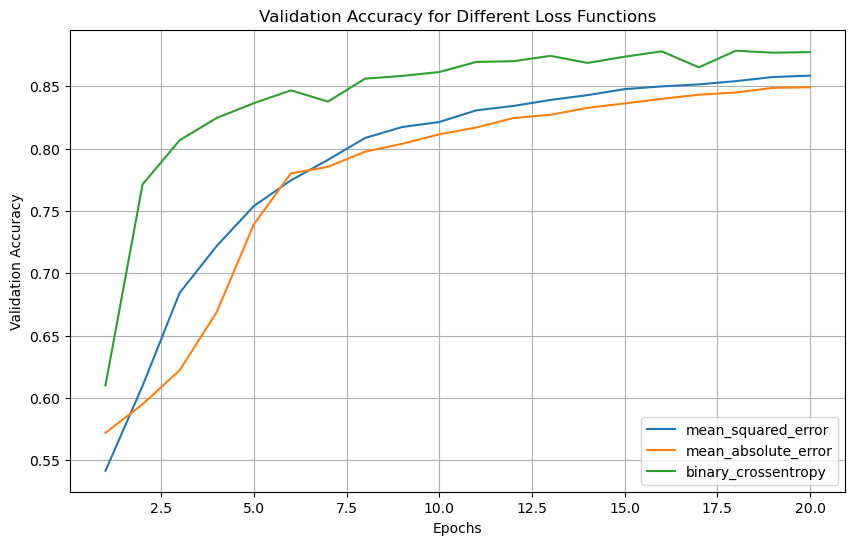

The highest validation accuracy on last epoch is: binary_crossentropy


In [179]:
epochs = range(1, 21)  
plt.figure(figsize=(10, 6))
result = []

for i, loss_function in enumerate(loss):
    plt.plot(epochs, val_results[i], label=loss_function)
    result.append((loss_function, val_results[i][-1]))
plt.title('Validation Accuracy for Different Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
print(f'The highest validation accuracy on last epoch is: {max(result, key = lambda k: k[1])[0]}')

In [180]:
# here I will use the binary cross entropy loss function because it performed the best in previous experiment
# we want to compare the different batch sizes
batch_sizes = [16, 32, 64, 128, 256, 512]
val_results = []
for i in batch_sizes:
    model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                                 keras.layers.Dense(16, activation='relu'), 
                                 keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=i, validation_data = (x_val, y_val))
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    val_results.append(val_acc_values)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6608 - loss: 0.6291 - val_accuracy: 0.8438 - val_loss: 0.3814
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.8630 - loss: 0.3398 - val_accuracy: 0.8660 - val_loss: 0.3183
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.8995 - loss: 0.2583 - val_accuracy: 0.8515 - val_loss: 0.3505
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9137 - loss: 0.2190 - val_accuracy: 0.8789 - val_loss: 0.2987
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9303 - loss: 0.1857 - val_accuracy: 0.8827 - val_loss: 0.3075
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9392 - loss: 0.1646 - val_accuracy: 0.8729 - val_loss: 0.3227
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9462 - loss: 0.1461 - val_accuracy: 0.8664 - val_loss: 0.3618
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.9565 - loss: 0.1232 - va

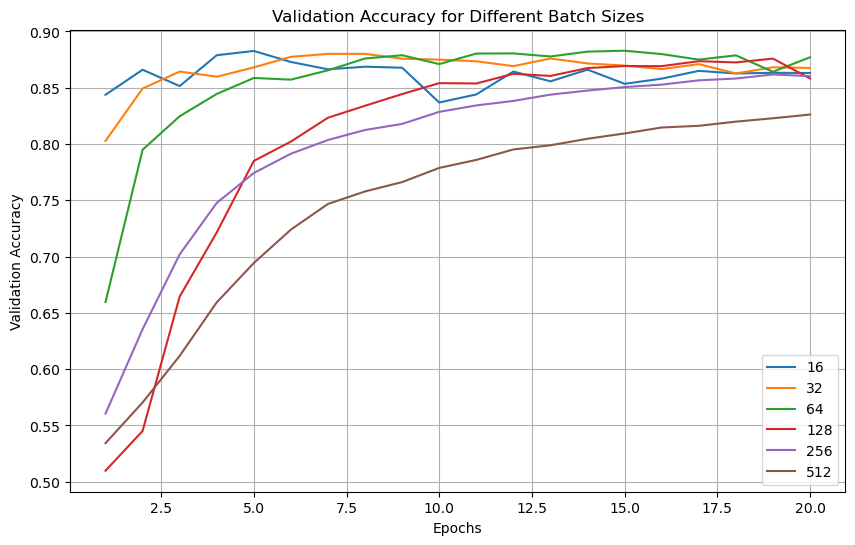

The highest validation accuracy on last epoch is: 64


In [181]:
epochs = range(1, 21)
plt.figure(figsize=(10, 6))
result = []
for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs, val_results[i], label=str(batch_size))
    result.append((batch_size, val_results[i][-1]))
plt.title('Validation Accuracy for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f'The highest validation accuracy on last epoch is: {max(result, key = lambda k: k[1])[0]}')

In [182]:
# we will use batch size 128 and binary cross entropy
# this is to find the optimal optimizer
# here I will use the binary cross entropy loss function because it performed the best in previous experiment
# we want to compare the different batch sizes
optimizers = ['sgd', 'rmsprop', 'adam', 'adamax', 'adadelta']
val_results = []
for i in optimizers:
    model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                                 keras.layers.Dense(16, activation='relu'), 
                                 keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer=i, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_data = (x_val, y_val))
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    val_results.append(val_acc_values)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5010 - loss: 0.6942 - val_accuracy: 0.5783 - val_loss: 0.6877
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6044 - loss: 0.6838 - val_accuracy: 0.6861 - val_loss: 0.6697
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7116 - loss: 0.6592 - val_accuracy: 0.7485 - val_loss: 0.6301
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.6120 - val_accuracy: 0.7908 - val_loss: 0.5730
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8073 - loss: 0.5514 - val_accuracy: 0.8088 - val_loss: 0.5140
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8224 - loss: 0.4935 - val_accuracy: 0.8216 - val_loss: 0.4618
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8457 - loss: 0.4364 - val_accuracy: 0.8341 - val_loss: 0.4210
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8537 - loss: 0.3955 - val_accuracy: 0.

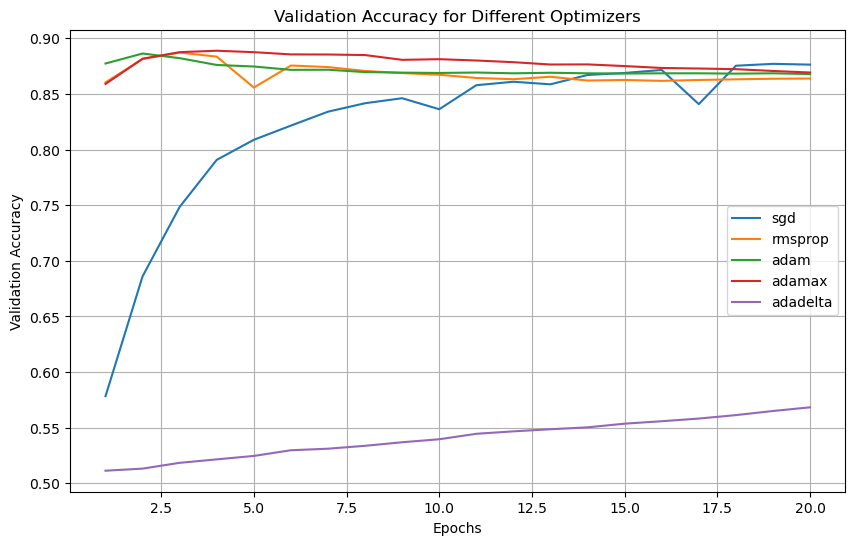

The highest validation accuracy on last epoch is: sgd


In [183]:
epochs = range(1, 21)
plt.figure(figsize=(10, 6))
result = []
for i, optimizer in enumerate(optimizers):
    plt.plot(epochs, val_results[i], label=str(optimizer))
    result.append((optimizer, val_results[i][-1]))

plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f'The highest validation accuracy on last epoch is: {max(result, key = lambda k: k[1])[0]}')

In [185]:
# this model tahes the hyperparameters that performed the best in the previous experiments
model = keras.models.Sequential([keras.layers.Dense(16, activation='relu', input_shape = (10000,)),
                             keras.layers.Dense(16, activation='relu'), 
                             keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_data = (x_val, y_val))
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\n\nThe final accuracy: {accuracy}') 

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5031 - loss: 0.6931 - val_accuracy: 0.5434 - val_loss: 0.6909
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5655 - loss: 0.6894 - val_accuracy: 0.6046 - val_loss: 0.6857
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6397 - loss: 0.6818 - val_accuracy: 0.6989 - val_loss: 0.6698
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7192 - loss: 0.6632 - val_accuracy: 0.7285 - val_loss: 0.6465
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7621 - loss: 0.6346 - val_accuracy: 0.7786 - val_loss: 0.6076
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.5916 - val_accuracy: 0.7951 - val_loss: 0.5585
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.5378 - val_accuracy: 0.8107 - val_loss: 0.5050
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.4816 - val_accuracy: 0.